<h2>First we want to examine an X-ray image.</h2>

In [ ]:
import os
import imageio

DIR = "images"

xray_image = imageio.v3.imread(os.path.join(DIR, "00000011_001.png"))

We can check things like the shape (number of pixels) of the image, and also the data type.

In [ ]:
print(xray_image.shape)
print(xray_image.dtype)

Using `matplotlib` lets now display the image in a greyscale colourmap.

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(xray_image, cmap="gray")
plt.axis("off")
plt.show()

Now we have seen 1 image, lets stack all the other images together into a `numpy array`. If we loop across all the images and put them into an array, we hold all the values from the images pixels in an array format, where all images are stacked.

In [4]:
import numpy as np
num_imgs = 9

combined_xray_images_1 = np.array(
    [imageio.v3.imread(os.path.join(DIR, f"00000011_00{i}.png")) for i in range(num_imgs)]
)

We can see the array here, and how it is a stack of 2D images.

In [7]:
combined_xray_images_1.shape # 9 images, 1024 by 1024 pixels

(9, 1024, 1024)

Lets have a look at a sort of health progress, by plotting each of these images next to each other.

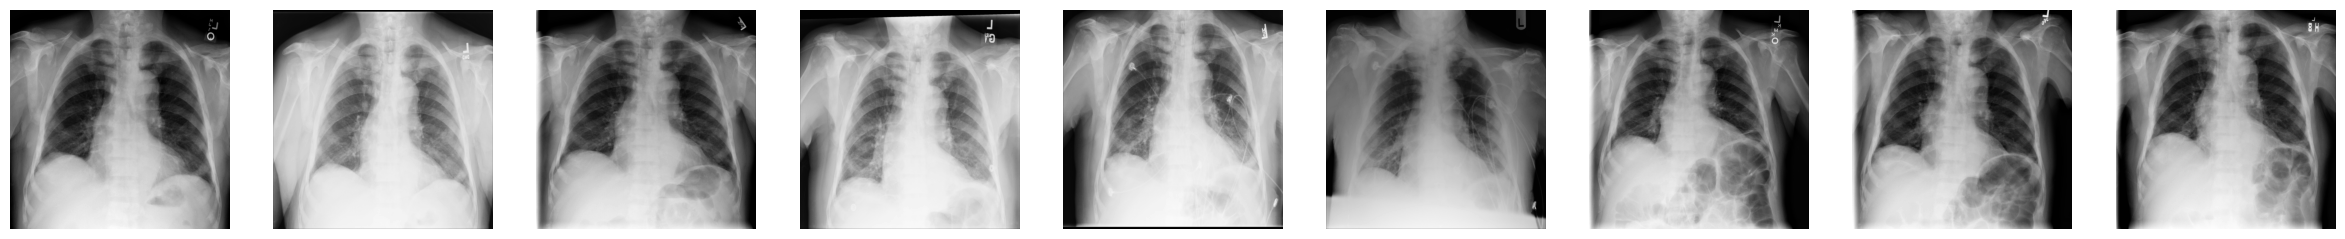

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=num_imgs, figsize=(30,30))

for img, ax in zip(combined_xray_images_1, axes):
    ax.imshow(img, cmap="gray")
    ax.axis('off')

We can even create a gif of the images!

In [11]:
GIF_PATH = os.path.join(DIR, "xray_image.gif")
imageio.mimwrite(GIF_PATH, combined_xray_images_1, format= ".gif", duration=1000)

When processing data (especially biodmedical data), it is useful to emphasize the 2D `edges` to focus on a particular feature in an image. We use `image gradients` to detect the changing on colour pixel density.

Let's start with an n-dimensional Laplace filter `("Laplacian-Gaussian")` that uses Gaussian second derivatives. This Laplacian method focuses on pixels with rapid intensity change in values and is combined with Gaussian smoothing to remove noise.

In [12]:
from scipy import ndimage

xray_image_laplace_gaussian = ndimage.gaussian_laplace(xray_image, sigma=1)

Lets compare the original to the one with the filter applied

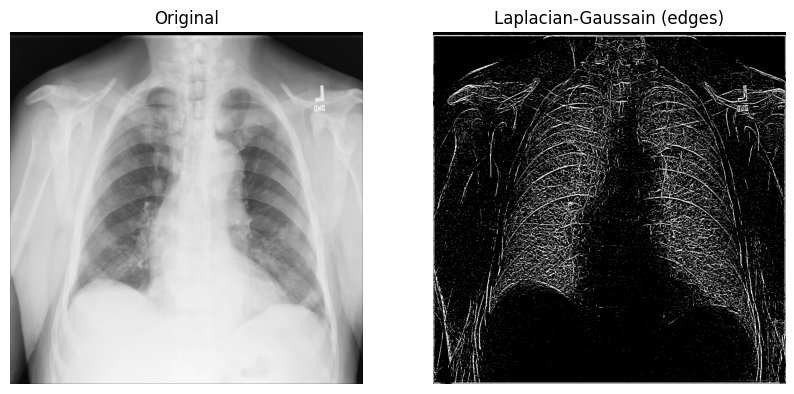

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Laplacian-Gaussain (edges)")
axes[1].imshow(xray_image_laplace_gaussian, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()

There are multiple other filters we can use, that all have different approaches. Now though we will look at screening out only certain pixels in X-ray images to help detect particular features.

Lets retrieve some basic statistics about the pixel values in the original X-ray image.

In [14]:
print("The data type of the X-ray image is: ", xray_image.dtype)
print("The minimum pixel value is: ", np.min(xray_image))
print("The maximum pixel value is: ", np.max(xray_image))
print("The average pixel value is: ", np.mean(xray_image))
print("The median pixel value is: ", np.median(xray_image))

The data type of the X-ray image is:  uint8
The minimum pixel value is:  0
The maximum pixel value is:  255
The average pixel value is:  172.52233219146729
The median pixel value is:  195.0


The array data type is uint8 and the minimum/maximum value results suggest that all 256 colors (from 0 to 255) are used in the X-ray. Let's visualize the pixel intensity distribution of the original raw X-ray image with ndimage.histogram() and Matplotlib:

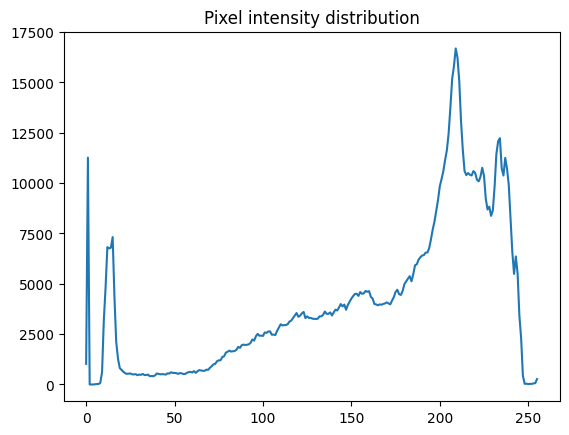

In [15]:
pixel_intensity_distribution = ndimage.histogram(
    xray_image, min=np.min(xray_image), max=np.max(xray_image), bins=256
)

plt.plot(pixel_intensity_distribution)
plt.title("Pixel intensity distribution")
plt.show()